In [2]:
# import libraries and packages
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import csv
import pprint as pp



## Price Change Marker
This notebook is intended to perform the following processes:

    1.1 Read-in preprocessed bitcoin data from Kaggle.

    1.2 Perform clean up and additional preprocessing.

    1.3 Detect and label 

___

In [3]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686594 entries, 0 to 1686593
Data columns (total 8 columns):
Timestamp            1686594 non-null int64
Open                 1686594 non-null float64
High                 1686594 non-null float64
Low                  1686594 non-null float64
Close                1686594 non-null float64
Volume_(BTC)         1686594 non-null float64
Volume_(Currency)    1686594 non-null float64
Weighted_Price       1686594 non-null float64
dtypes: float64(7), int64(1)
memory usage: 102.9 MB


__Clean-Up and Pre-Processing__

In [4]:
# change time zone to UTC -0
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.Timestamp = df.Timestamp.dt.tz_localize('UTC')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00+00:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [5]:
#Convert Timestamp into separate Date and Time
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

del df['Timestamp'] #Delete original datetime column

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
0,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:33:00
1,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:34:00
2,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:35:00
3,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:36:00
4,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01,05:37:00


In [6]:
price=df['Close']

In [7]:
# calculate rolling average and standard deviation in one day period

min_periods = 43200

# Calculate the sd and volatility
mean=price.rolling(min_periods).mean()
sd=price.rolling(min_periods).std()
vol = price.rolling(min_periods).std() * np.sqrt(min_periods) 
df['Average']=mean
df['Volatility']=vol
df['SD']=sd
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1686589,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667,2018-03-26,23:56:00,9434.270142,232584.323674,1119.021849
1686590,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865,2018-03-26,23:57:00,9434.234424,232587.698813,1119.038088
1686591,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628,2018-03-26,23:58:00,9434.198808,232591.105101,1119.054476
1686592,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847,2018-03-26,23:59:00,9434.163076,232594.538752,1119.070996
1686593,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384,2018-03-27,00:00:00,9434.127729,232598.022532,1119.087758


In [8]:
# select study dates range
index_1 = df[df.Date == datetime.date(dt.datetime.strptime('01/27/18', '%x'))].index[0]
index_2 = df[df.Date == datetime.date(dt.datetime.strptime('03/27/18', '%x'))].index[0]
df_1= df.loc[index_1:index_2]

df_1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time,Average,Volatility,SD
1601633,11086.88,11086.89,11086.88,11086.89,3.475604,38533.636812,11086.889272,2018-01-27,00:00:00,13354.785311,367199.735578,1766.690552
1601634,11086.89,11089.00,11086.88,11089.00,11.214766,124339.102380,11087.088342,2018-01-27,00:01:00,13354.685122,367200.933752,1766.696316
1601635,11089.00,11099.00,11089.00,11098.99,25.761195,285765.230790,11092.856235,2018-01-27,00:02:00,13354.585167,367202.070136,1766.701784
1601636,11098.99,11099.00,11098.99,11099.00,1.083112,12021.453112,11098.998581,2018-01-27,00:03:00,13354.485213,367203.205280,1766.707245
1601637,11098.99,11099.00,11098.99,11098.99,4.025234,44676.062985,11098.997333,2018-01-27,00:04:00,13354.386095,367204.540260,1766.713668


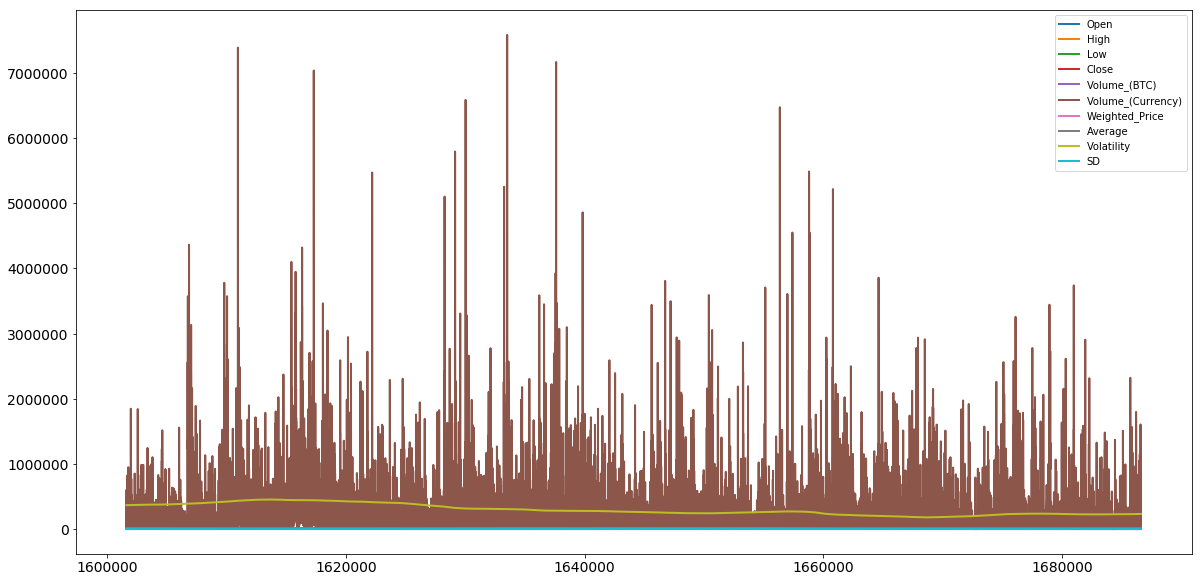

In [10]:
df_1.plot(figsize=(20,10), linewidth=2, fontsize=14)
plt.show()

In [23]:
# take daily average and group by date
df_2=df_1.groupby(df_1.Date).mean()
df_2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD
Date,,,,,,,,,,
2018-01-27,11177.254542,11182.093500,11172.314326,11177.383819,8.325551,93366.121547,11177.335040,13299.159649,370485.506037,1782.499222
2018-01-28,11425.907035,11430.281958,11422.407681,11426.112271,9.252465,105956.501345,11426.139665,13198.271418,375054.817538,1804.483332
2018-01-29,11137.583674,11140.958229,11133.652896,11137.279299,7.619312,84888.235432,11137.324422,13102.589609,379154.300212,1824.206977
2018-01-30,10621.101118,10627.480681,10613.562326,10620.313118,18.900901,194549.235567,10620.605888,13025.871604,387245.629262,1863.136402
2018-01-31,9978.939889,9986.435667,9970.953299,9978.950660,13.351993,132254.567681,9978.619754,12914.256311,400836.959836,1928.527722


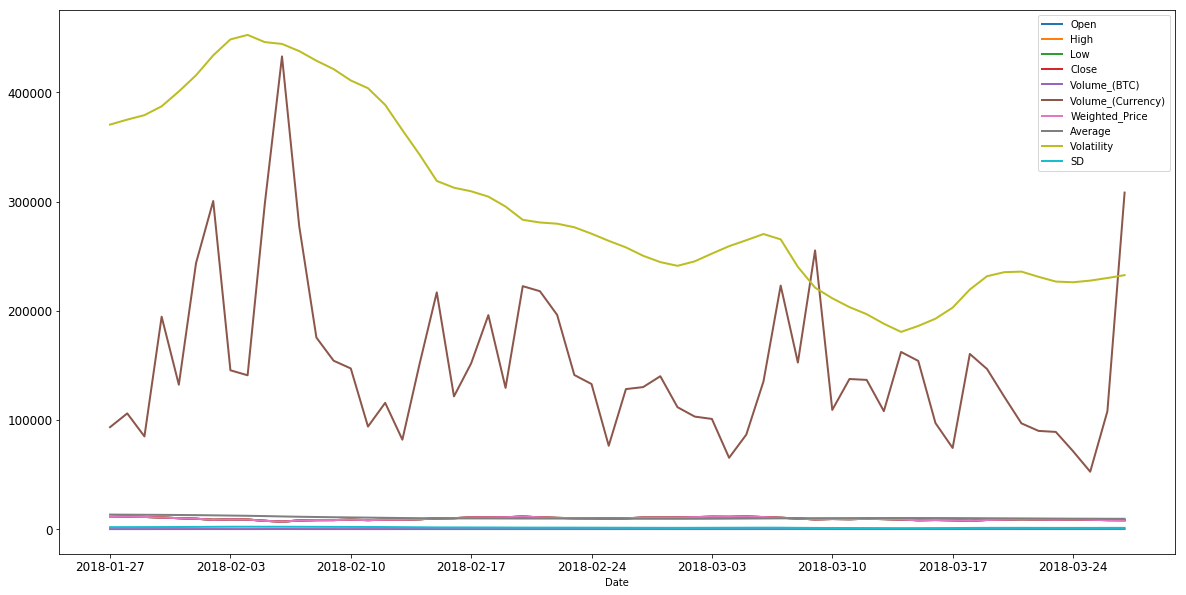

In [13]:
df_2.plot(figsize=(20,10), linewidth=2, fontsize=12)
plt.show()

__Detect and Label__

In [15]:
# find date have average change larger than 2 times sd change
upward=[]
downward=[]
#marker = []
avechange=[]
sdchange=[]

for i in range(len(df_2)-1):
    # track movement
    avg = (df_2['Weighted_Price'].iloc[i]+ df_2['Weighted_Price'].iloc[i-1])/2
    
     # track difference is daily EODA
    avediff=(df_2['Average'].iloc[i+1]-df_2['Average'].iloc[i])/df_2['Average'].iloc[i]
    sddiff=(df_2['SD'].iloc[i+1]-df_2['SD'].iloc[i])/df_2['SD'].iloc[i]
    
    avechange.append(avediff)
    sdchange.append(sddiff)
    
    # record date of significant price change
    if abs(avechange[i]) > 2*(sdchange[i]):
        marker.append(df_2.index[i])
    
    # keep track of overall trend on date of significant price change
    if abs(avechange[i]) > 2*(sdchange[i]) and df_2['Weighted_Price'].iloc[i+1] > avg:
        upward.append(df_2.index[i])
    else:
        downward.append(df_2.index[i])
    
   
 

__Plot of Event Recognition__

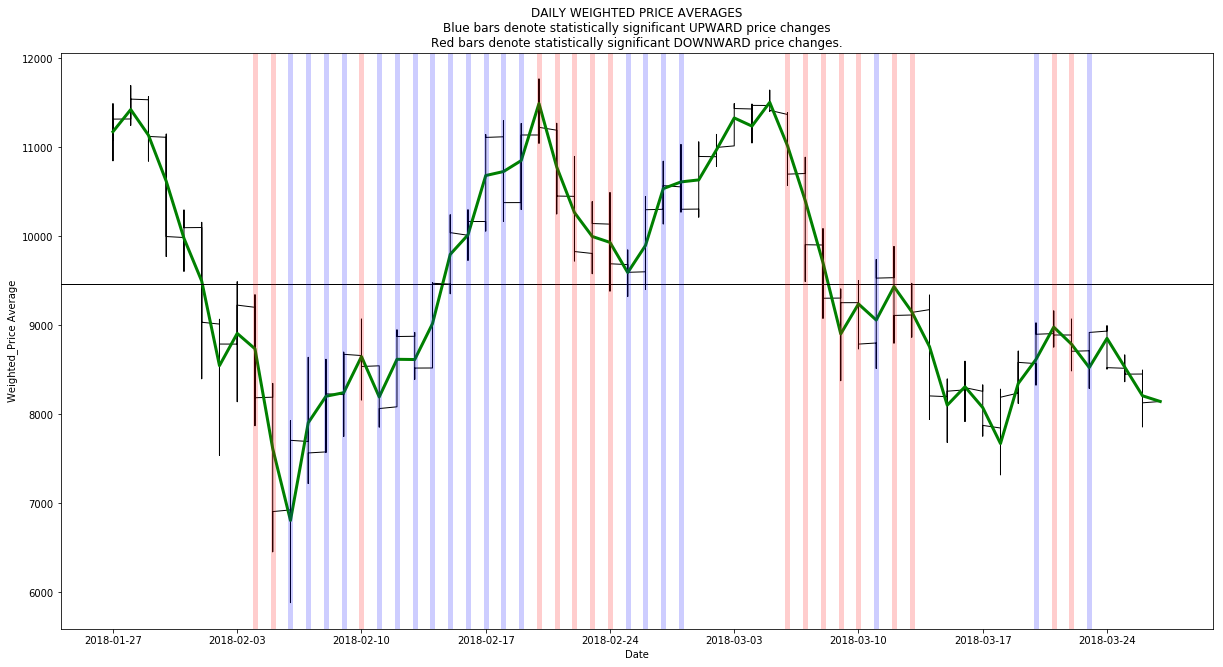

In [21]:
## Plot of newsevent recognition ##

fig = plt.figure(figsize=(20,10)) 
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(df_1.Date, df_1.Weighted_Price, linewidth=1, c = 'black')
axes.plot(df_2.index, df_2.Weighted_Price, linewidth=3, c = 'green')

# Give plot a point of reference
plt.axhline(np.mean(df_2.Weighted_Price), color='k', linestyle='-', linewidth=1) # average

# Plot newsevent markers
for xc in marker:
    if xc in upward:
        plt.axvline(x=xc,linewidth=5, color='blue', alpha = .1)
    else:
        plt.axvline(x=xc,linewidth=5, color='red', alpha = .1)

    
## make plot pretty ##    
# add titles
plt.title('DAILY WEIGHTED PRICE AVERAGES\nBlue bars denote statistically significant UPWARD price changes\nRed bars denote statistically significant DOWNWARD price changes.')
    
# add axis labels
plt.ylabel('Weighted_Price Average')
plt.xlabel('Date')

plt.show()

In [163]:
df = pd.DataFrame({'Date':marker})
df.to_csv('marker.csv',index=False)

___